In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

In [18]:
from help_functions import get_energy_data

energy_data = get_energy_data.get_data(
    'C:/Users/Maria/Documents/Studium/Pyhton Projekte/PTSFC/energy_consumption/hourly_ec_20201107_20231107.csv')

energy_data['weekday'] = energy_data.index.weekday  # monday = 0, sunday = 6
energy_data['hour'] = energy_data.index.hour
energy_data['month'] = energy_data.index.month
energy_data.head()

,date,beginning,energy_consumption,weekday,hour,month
date_time,,,,,,
2020-11-07 00:00:00,2020-11-07,00:00:00,46.97475,5,0,11
2020-11-07 01:00:00,2020-11-07,01:00:00,45.35550,5,1,11
2020-11-07 02:00:00,2020-11-07,02:00:00,44.66450,5,2,11
2020-11-07 03:00:00,2020-11-07,03:00:00,44.76300,5,3,11
2020-11-07 04:00:00,2020-11-07,04:00:00,44.81150,5,4,11


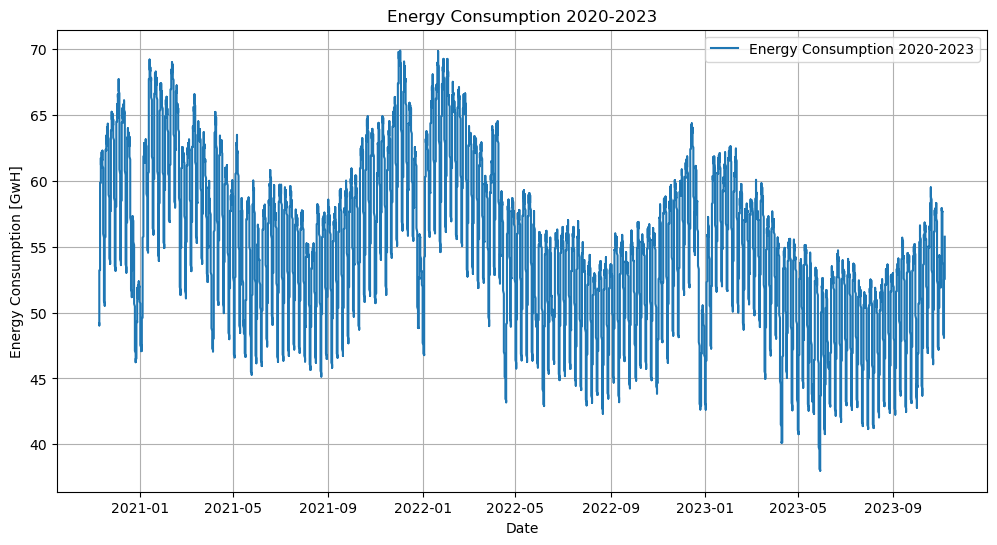

In [19]:
window_size = 50  # Adjust as needed
energy_data['smoothed'] = energy_data['energy_consumption'].rolling(
    window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(energy_data['date'], energy_data['smoothed'],
         label='Energy Consumption 2020-2023')
plt.xlabel('Date')
plt.ylabel('Energy Consumption [GwH]')
plt.title('Energy Consumption 2020-2023')
plt.legend()
plt.grid(True)
plt.show()

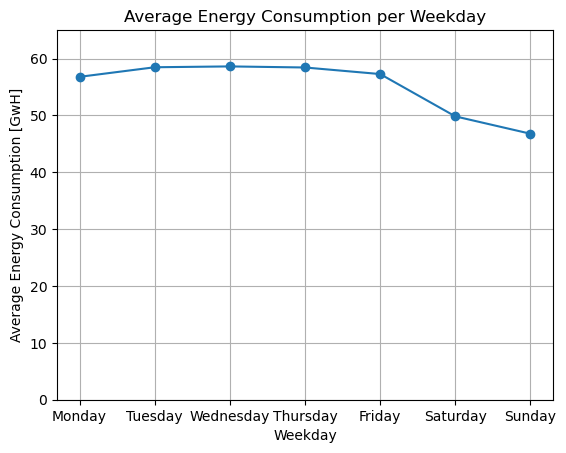

In [20]:
# plot average energy consumption throughout week

energy_data_per_weekday = energy_data.groupby(
    by='weekday')['energy_consumption'].mean()
energy_data_per_weekday = energy_data_per_weekday.to_frame().reset_index()

# define the weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday',
            'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create bar plot
plt.plot(weekdays, energy_data_per_weekday.loc[:,
         'energy_consumption'], marker='o', linestyle='-')
plt.xlabel('Weekday')
plt.ylabel('Average Energy Consumption [GwH]')
plt.title('Average Energy Consumption per Weekday')
plt.grid(True)  # Add grid lines
plt.ylim(0, 65)
plt.show()

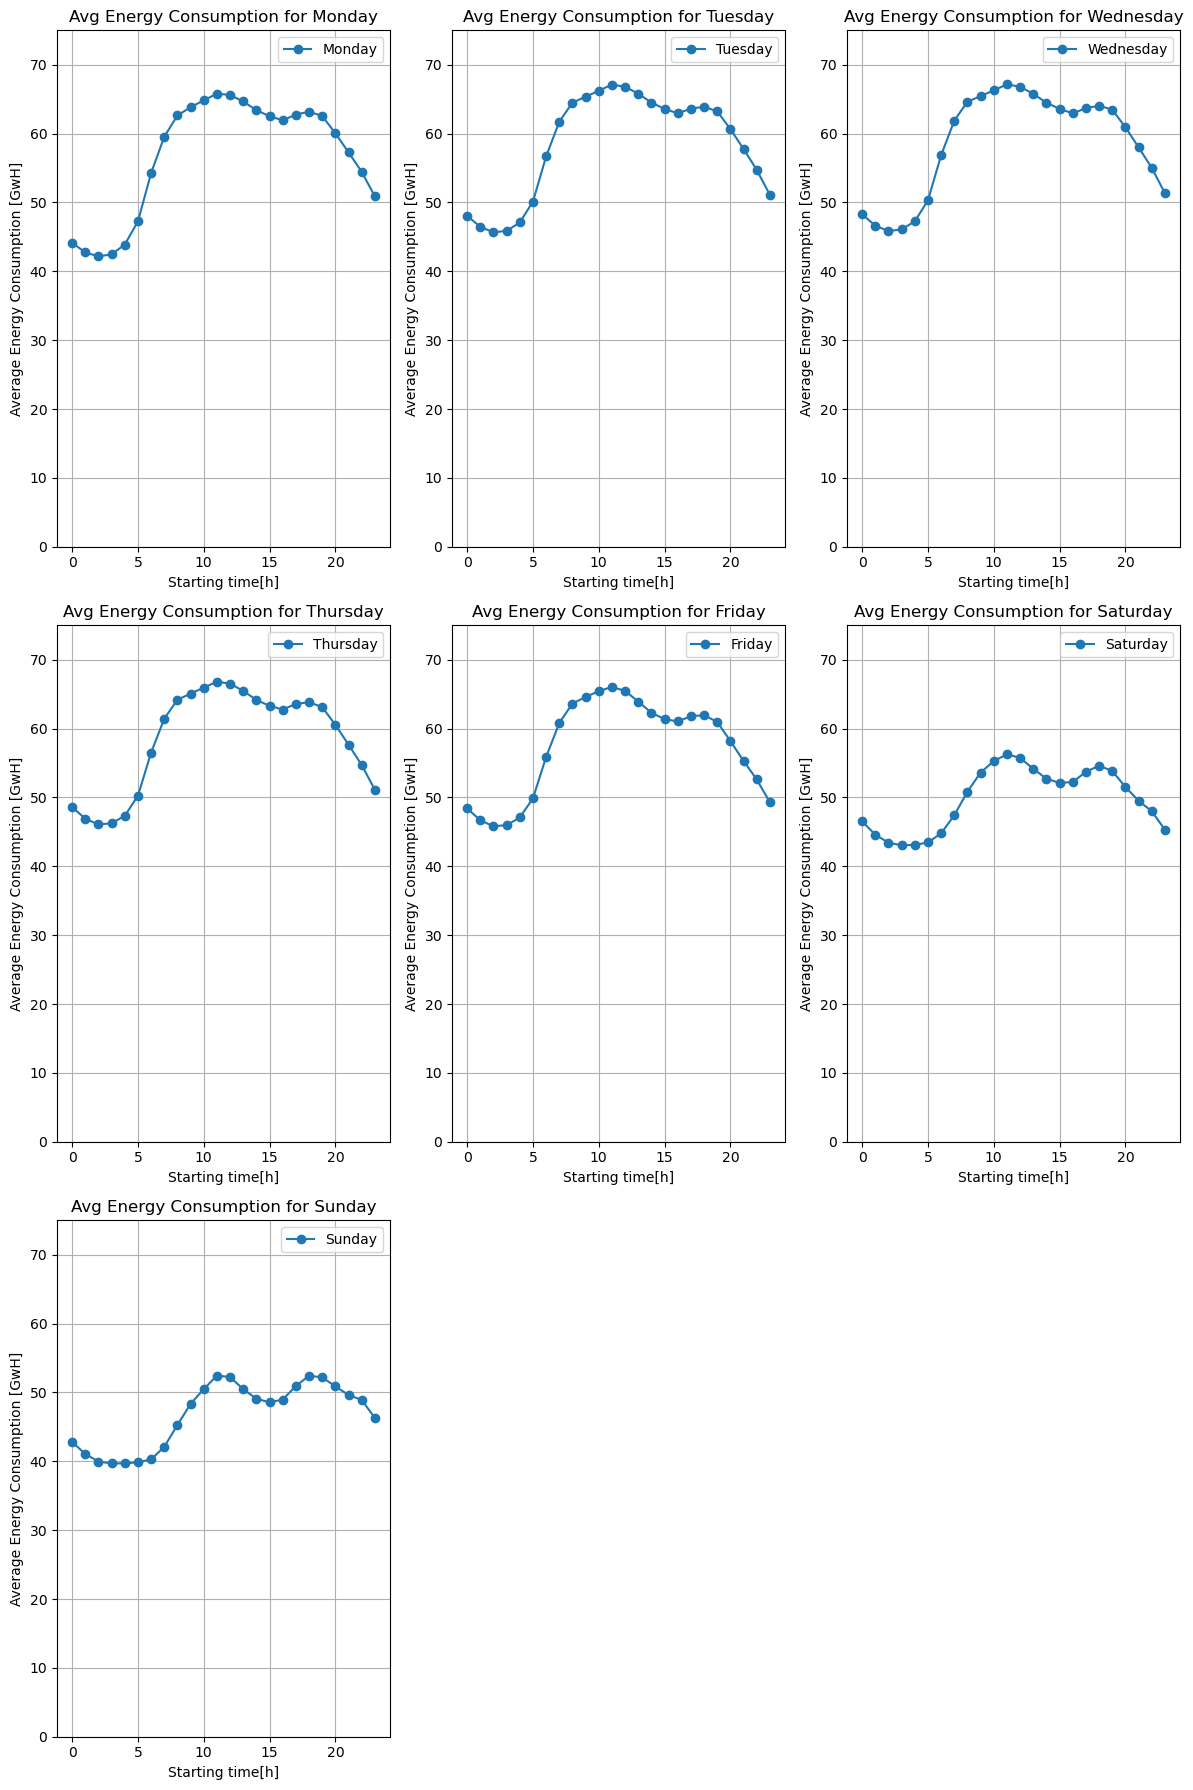

In [23]:
energy_data_per_day_hour_and_weekday = energy_data.groupby(
    ['weekday', 'hour'])['energy_consumption'].mean().unstack()

# Create subplots with two or three plots in a row
num_weekdays = len(weekdays)
num_plots_per_row = 3
num_rows = (num_weekdays + num_plots_per_row - 1) // num_plots_per_row
hours = range(24)
# Set the figure size based on the number of rows and plots per row
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(12, 6*num_rows))

for day, ax in zip(range(num_weekdays), axes.flatten()):
    ax.plot(hours, energy_data_per_day_hour_and_weekday.loc[day, :],
            marker='o', linestyle='-', label=weekdays[day])
    ax.set_xlabel('Starting time[h]')
    ax.set_ylabel('Average Energy Consumption [GwH]')
    ax.set_title(f'Avg Energy Consumption for {weekdays[day]}')
    ax.grid(True)
    ax.set_ylim(0, 75)
    ax.legend()

# Hide any empty subplots
for i in range(num_weekdays, num_rows * num_plots_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # Adjust subplot spacing
plt.show()

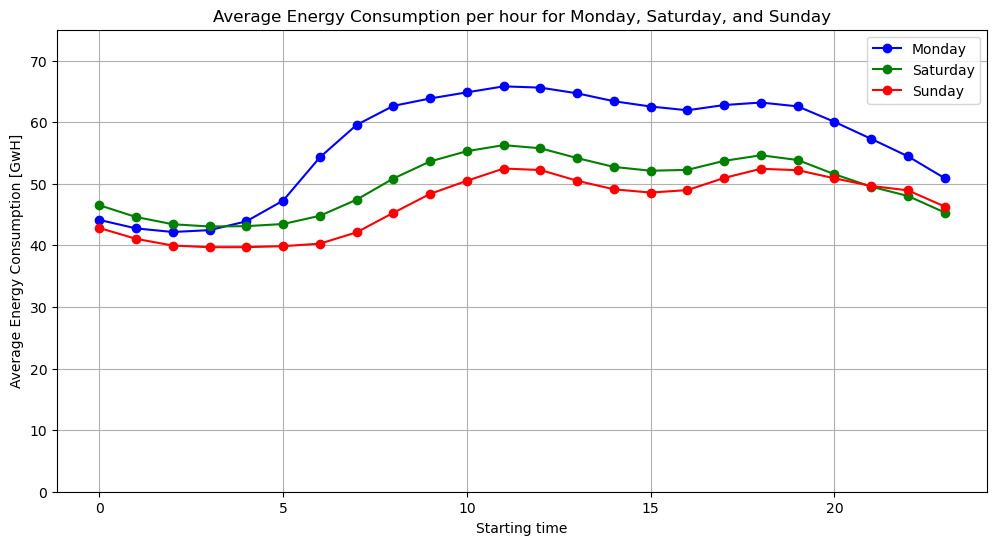

In [24]:
selected_weekdays = ['Monday', 'Saturday', 'Sunday']
colors = ['b', 'g', 'r']  # Colors for Monday, Saturday, and Sunday

plt.figure(figsize=(12, 6))

for day, color in zip(selected_weekdays, colors):
    day_index = weekdays.index(day)
    plt.plot(hours, energy_data_per_day_hour_and_weekday.loc[day_index, :],
             marker='o', linestyle='-', label=day, color=color)

plt.xlabel('Starting time')
plt.ylabel('Average Energy Consumption [GwH]')
plt.title('Average Energy Consumption per hour for Monday, Saturday, and Sunday')
plt.grid(True)
plt.ylim(0, 75)
plt.legend()
plt.show()